In [9]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

In [29]:
result =[]
filepath = 'data_202106.tsv'
import codecs
with codecs.open(filepath,'rb','gb18030',errors='ignore') as csvfile:
    for line in csvfile:
        temp1=line.split('\t')
        result.append(temp1)

In [30]:
len(result)

4503241

In [31]:
#将读取的list转换成dataframe类型
df=pd.DataFrame(result)

In [32]:
#准备更改列名
a=[]
for i in range(21):
    a.append(df.iloc[0][i])
print(a)
df.columns=a
df.drop([0,1],inplace = True)

['DATA_MONTH', 'ITEM_ID', 'ITEM_NAME', 'BRAND_ID', 'BRAND_NAME', 'ITEM_PRICE', 'ITEM_SALES_VOLUME', 'ITEM_SALES_AMOUNT', 'CATE_NAME_LV1', 'CATE_NAME_LV2', 'CATE_NAME_LV3', 'CATE_NAME_LV4', 'CATE_NAME_LV5', 'ITEM_FAV_NUM', 'TOTAL_EVAL_NUM', 'ITEM_STOCK', 'ITEM_DELIVERY_PLACE', 'ITEM_PROD_PLACE', 'ITEM_PARAM', 'USER_ID', 'SHOP_NAME\r\n']


In [33]:
#清除无关信息
df.drop(columns=['DATA_MONTH','BRAND_NAME','ITEM_STOCK','ITEM_DELIVERY_PLACE', 'ITEM_PROD_PLACE','ITEM_PARAM','SHOP_NAME\r\n'],inplace=True)

In [8]:
#空字符串即“ ”（一个或多个空格），但在excel表格里其实是看不出来，pandas也把它当成有值进行操作
#正则匹配空格替换 其中\s表示空白字符，匹配任何空白字符，包括空格、制表符、换页符等
df.replace(to_replace=r'^\s*$',value='Nan',regex=True,inplace=True)

In [7]:
#删除收藏数，评论数，库存中有缺失值的情况
df.dropna(subset=['ITEM_FAV_NUM', 'TOTAL_EVAL_NUM', 'ITEM_STOCK'],inplace=True)

In [8]:
#看看数据
explore=df.describe(include='all').T
print(explore)

                       count   unique          top    freq
ITEM_ID              1785123  1785123  41365691123       1
BRAND_ID             1393568   152556        29534  239779
ITEM_PRICE           1785123    21931          9.9   31369
ITEM_SALES_VOLUME    1785123    10237            1  331026
ITEM_SALES_AMOUNT    1785123   114124           30    8166
CATE_NAME_LV1        1784242       16         百货食品  355127
CATE_NAME_LV2        1784242      180        五金/工具  107026
CATE_NAME_LV3        1783305     1868        汽车零配件   32984
CATE_NAME_LV4        1278293     6888    其他DIY饰品配件   13068
CATE_NAME_LV5         308323     3231           其它    5355
ITEM_FAV_NUM         1785123    22564            0   90956
TOTAL_EVAL_NUM       1785123    14987            0  119405
ITEM_STOCK           1785123   268385            0    5711
ITEM_DELIVERY_PLACE  1782609      464         广东广州  198493
ITEM_PROD_PLACE       575710     1051         中国大陆  343395


In [9]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x:'%.f'%x)

In [9]:
number=df[['ITEM_PRICE','ITEM_SALES_VOLUME','ITEM_SALES_AMOUNT','ITEM_FAV_NUM', 'TOTAL_EVAL_NUM']]
number=number.astype('float')
exp=number.describe(include='all').T
exp=exp[['mean','std','min','25%','50%','75%','max']]
print(exp)

                          mean           std   min   25%    50%     75%  \
ITEM_PRICE          151.566736  1.070202e+03  0.01  10.5   29.0    80.0   
ITEM_SALES_VOLUME   172.496054  6.445427e+03  1.00   2.0    7.0    28.0   
ITEM_SALES_AMOUNT  4352.084525  1.122610e+05  0.01  65.0  240.0  1000.0   
ITEM_FAV_NUM       2376.385429  1.607326e+06  0.00  18.0   82.0   380.0   
TOTAL_EVAL_NUM      299.325886  3.957649e+03  0.00   5.0   24.0    91.0   

                            max  
ITEM_PRICE         3.200000e+05  
ITEM_SALES_VOLUME  2.909043e+06  
ITEM_SALES_AMOUNT  8.204448e+07  
ITEM_FAV_NUM       2.147484e+09  
TOTAL_EVAL_NUM     1.065730e+06  


In [9]:
# index1=df['ITEM_PRICE'].astype('float')>1000
# index2=df['ITEM_SALES_VOLUME'].astype('float')>500
# line=df[(index1|index2)]
index=df['CATE_NAME_LV1']=='手机数码'
df=df[index]
df.to_csv('endline.csv')

In [9]:
data=pd.read_csv('line.csv')
data.dropna(subset=['CATE_NAME_LV1'],inplace=True)

In [10]:
file=data.describe(percentiles=None,include='all').T
print(file)

                       count unique        top   freq                 mean  \
Unnamed: 0           73800.0    NaN        NaN    NaN       2241338.597507   
ITEM_ID              73800.0    NaN        NaN    NaN  520639752815.028198   
BRAND_ID             59089.0    NaN        NaN    NaN     762366126.116147   
ITEM_PRICE           73800.0    NaN        NaN    NaN          1533.051379   
ITEM_SALES_VOLUME    73800.0    NaN        NaN    NaN          5534.430732   
ITEM_SALES_AMOUNT    73800.0    NaN        NaN    NaN        242661.697639   
CATE_NAME_LV1          73800     15       家居建材  21977                  NaN   
CATE_NAME_LV2          73800    158      五金/工具   7726                  NaN   
CATE_NAME_LV3          73454   1395       机械五金   2191                  NaN   
CATE_NAME_LV4          58919   3872  其他机械五金（新）    903                  NaN   
CATE_NAME_LV5          13786   1564  点心包装盒/包装袋    395                  NaN   
ITEM_FAV_NUM         73800.0    NaN        NaN    NaN          5

In [5]:
# print(file.iloc[6:11]['unique'])
app=[]
for i in range(6,11):
    app.append(file.iloc[i]['unique'])
print(app)



[15, 158, 1395, 3872, 1564]


In [13]:
list=['b','c','d']
a= 'a' in list
print(False==0)

True


In [3]:
print(data.columns)

NameError: name 'data' is not defined

In [16]:
print(data['CATE_NAME_LV1'].value_counts())
# print(len(data['CATE_NAME_LV2'].unique()))
# print(len(data['CATE_NAME_LV3'].unique()))
# print(len(data['CATE_NAME_LV4'].unique()))




家居建材    21977
百货食品    13034
手机数码     9534
美妆饰品     5474
服装鞋包     4678
其他       3333
家用电器     3280
运动户外     2850
文化玩乐     2766
母婴用品     2552
生活服务     2092
汽配摩托     1744
游戏话费      233
盒马        130
其他商品      123
Name: CATE_NAME_LV1, dtype: int64


In [11]:
#读取手机数码这一类的endline.csv文件
data=pd.read_csv('endline.csv')

In [35]:
#读取data_shop.tsv文件
result =[]
filepath = 'data_shop.tsv'
import codecs
with codecs.open(filepath,'rb','gb18030',errors='ignore') as csvfile:
    for line in csvfile:
        temp1=line.split('\t')
        result.append(temp1)
#将读取的list转换成dataframe类型
df=pd.DataFrame(result)

In [36]:
#准备更改列名
a=[]
for i in range(19):
    a.append(df.iloc[0][i])
print(a)
df.columns=a
df.drop([0,1],inplace = True)

['DATA_MONTH', 'USER_ID', 'SHOP_NAME', 'SHOP_SALES_VOLUME', 'SHOP_SALES_AMOUNT', 'MAIN_BUSINESS', 'BUSINESS_SCOPE', 'SHOP_PROVINCE', 'SHOP_CITY', 'SHOP_OPEN_DATE', 'ITEMDESC_SCORE', 'SERVICE_SCORE', 'DELIVERY_SCORE', 'COMPANY_PROVINCE', 'COMPANY_CITY', 'COMPANY_COUNTY', 'SHOP_DELIVERY_PROVINCE', 'SHOP_DELIVERY_CITY', 'SHOP_DELIVERY_COUNTY\r\n']


In [37]:
#清除无关信息
df.drop(columns=['SHOP_NAME', 'SHOP_SALES_VOLUME', 'SHOP_SALES_AMOUNT', 'MAIN_BUSINESS', 'BUSINESS_SCOPE', 'SHOP_PROVINCE', 'SHOP_CITY', 'SHOP_OPEN_DATE', 'COMPANY_PROVINCE', 'COMPANY_CITY', 'COMPANY_COUNTY', 'SHOP_DELIVERY_PROVINCE', 'SHOP_DELIVERY_CITY', 'SHOP_DELIVERY_COUNTY\r\n'],inplace=True)

In [38]:
df.replace(to_replace=r'^\s*$',value='0',regex=True,inplace=True)

In [40]:
index1=df['ITEMDESC_SCORE']=='0'
df[index1]

,DATA_MONTH,USER_ID,ITEMDESC_SCORE,SERVICE_SCORE,DELIVERY_SCORE
498,202107,1632040030,0,0,0
634,202107,1106947054,0,0,0
988,202107,3957812167,0,0,0
1042,202107,81737257,0,0,0
1654,202107,407731528,0,0,0
...,...,...,...,...,...
653567,202108,3584521535,0,0,0
653736,202108,530517355,0,0,0
654019,202108,2250586522,0,0,0
654239,202108,674300280,0,0,0


In [1]:
# filedata[['ITEMDESC_SCORE']]=filedata[['ITEMDESC_SCORE']].astype('float')
# filedata[['SERVICE_SCORE']]=filedata[['SERVICE_SCORE']].astype('float')
# filedata[['DELIVERY_SCORE']]=filedata[['DELIVERY_SCORE']].astype('float')
# filedata[['USER_ID']]=filedata[['USER_ID']].astype('int64')

In [3]:
data=pd.read_csv('again.csv')
data.iloc[0:3]

,Unnamed: 0,ITEM_ID,ITEM_NAME,ITEM_PRICE,ITEM_SALES_VOLUME,CATE_NAME_LV1,CATE_NAME_LV2,CATE_NAME_LV3,CATE_NAME_LV4,CATE_NAME_LV5,Label1,Label2,Label3,Label4,Label5
0,2,559237486452,七巧板宝宝男童女童儿童袜子秋冬季全棉加厚纯棉袜中筒长筒堆堆袜,29.5,37,母婴用品,童装/婴儿装/亲子装,儿童袜子(0-16岁),Nan,Nan,9,142,268,123,37
1,3,560359123903,康乐果 利鼻片 0.25g*36片/盒 清热解毒 祛风开窍。用于风热蕴肺所致的伤风鼻塞、鼻渊...,18.0,2,百货食品,处方药,五官用药,鼻科用药,Nan,13,48,186,7873,37
2,4,562152845686,怀美二期手臂环吸塑身衣女收副乳塑托胸美体衣束胸内衣塑身胸托,299.0,69,服装鞋包,女士内衣/男士内衣/家居服,塑身上衣,Nan,Nan,8,51,583,123,37


In [6]:
y=[0,0,0,0]

([<matplotlib.axis.XTick at 0x1c98595f700>,
 [Text(0, 0, '0 - 100'),
  Text(1, 0, '100 - 1000'),
  Text(2, 0, '1000 - 10000'),
  Text(3, 0, '>10000')])

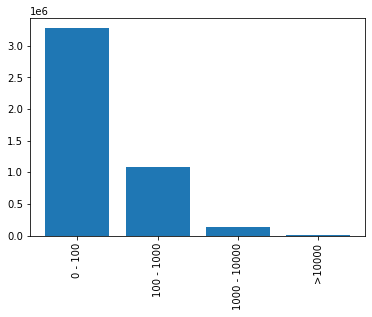

In [10]:
for i in range(len(data)):
    if(data.iloc[i,3]<100):
        y[0]=y[0]+1
    elif(data.iloc[i,3]<1000):
        y[1]=y[1]+1
    elif(data.iloc[i,3]<10000):
        y[2]=y[2]+1
    else:
        y[3]=y[3]+1

x_values=list(range(len(y)))
plt.bar(x_values,y,orientation='vertical')
plt.xticks(x_values,['0 - 100','100 - 1000','1000 - 10000','>10000'],rotation='vertical')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9865f4640>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9865f4d00>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1c9865f42e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9865ff400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9865ff760>],
 'means': []}

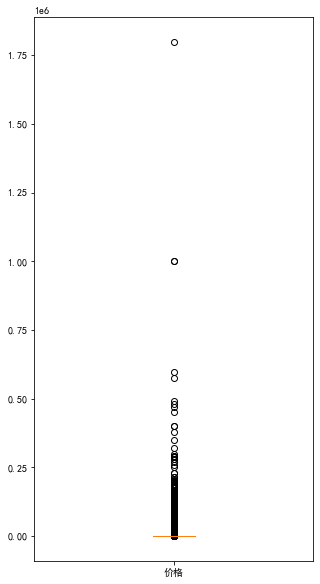

In [12]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
age = data['ITEM_PRICE']
fig = plt.figure(figsize=(5 ,10))
plt.boxplot(age, patch_artist=True,labels = ['价格'],boxprops = {'facecolor':'lightblue'})